In [2]:
%matplotlib inline
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist
import pandas as pd
from pandas import set_option
import sklearn
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities, _kl_divergence)
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)
#from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from time import time
set_option('display.max_rows',10)

In [3]:
#Loading the data
features124 = pd.read_excel('features124.xlsx')
features124

,cTemp,eLoad,iat,imap,rpm,speed
0,0.00,0.275132,0.684211,0.017699,0.206907,0.178082
1,0.00,0.296296,0.684211,0.008850,0.203070,0.178082
2,0.00,0.253968,0.684211,0.008850,0.235685,0.178082
3,0.05,0.296296,0.684211,0.017699,0.243359,0.191781
4,0.05,0.354497,0.684211,0.017699,0.304014,0.205479
...,...,...,...,...,...,...
4251,0.80,0.312169,0.052632,0.088496,0.497934,0.438356
4252,0.80,0.338624,0.052632,0.097345,0.531582,0.465753
4253,0.80,0.037037,0.052632,0.035398,0.527745,0.452055
4254,0.80,0.058201,0.105263,0.044248,0.470632,0.438356


In [4]:
X = features124.values

In [5]:
#Function to plot the embedding space
def plot_embedding(x, colors, title):
    # We choose a color palette with seaborn.
    #palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw = 0, cmap ='plasma', c = colors, edgecolor = 'black',alpha=0.5)
    cbar = plt.colorbar(sc)
    cbar.ax.get_yaxis().labelpad = 30
    cbar.ax.set_ylabel('Criminality score', rotation=270)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.title(title)
    ax.axis('off')
    ax.axis('tight')

   #return f, ax, sc, txts

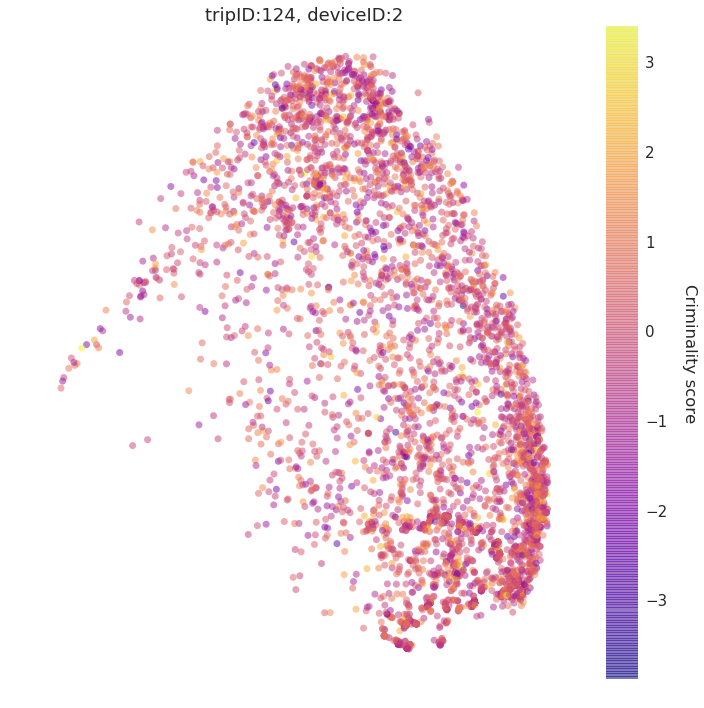

In [9]:
# Random Trees embedding
criminality = np.random.randn(len(X))
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0, max_depth=5)
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)
plot_embedding(X_reduced,criminality, 'Rnadom Forest tripID:124, deviceID:2')

In [10]:
# t-SNE embedding of the digits dataset
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)


NameError: name 'codes' is not defined

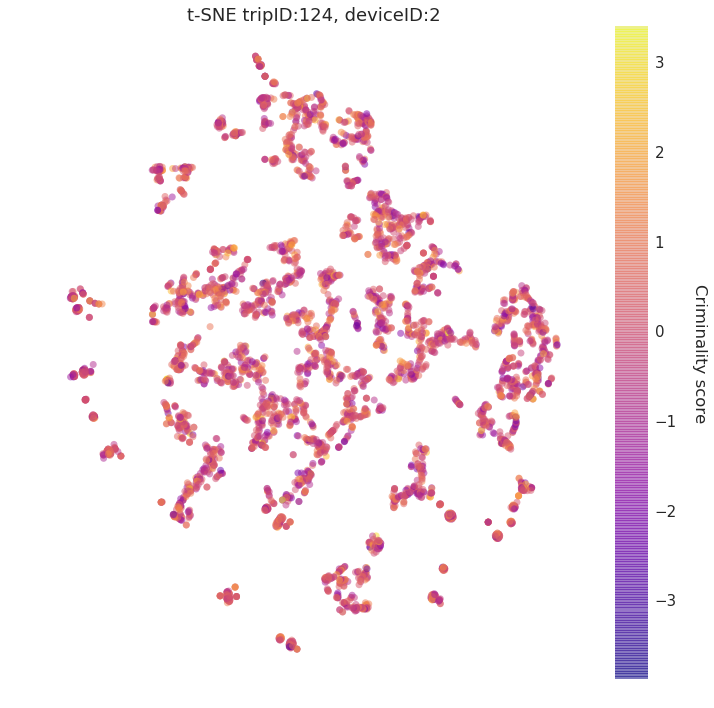

In [11]:
plot_embedding(X_tsne, criminality, "t-SNE tripID:124, deviceID:2")